In [3]:
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f = h5py.File('../data/data/GeoLife/0.h5', 'r')

In [4]:
list(f.keys())

['graph', 'trajectories']

In [5]:
graph = f['graph']
graph

<HDF5 group "/graph" (6 members)>

In [8]:
g = nx.from_edgelist(graph['edges'][()])
nx.set_node_attributes(g, {k: x for k, x in enumerate(graph['node_coordinates'][()])}, 'loc')

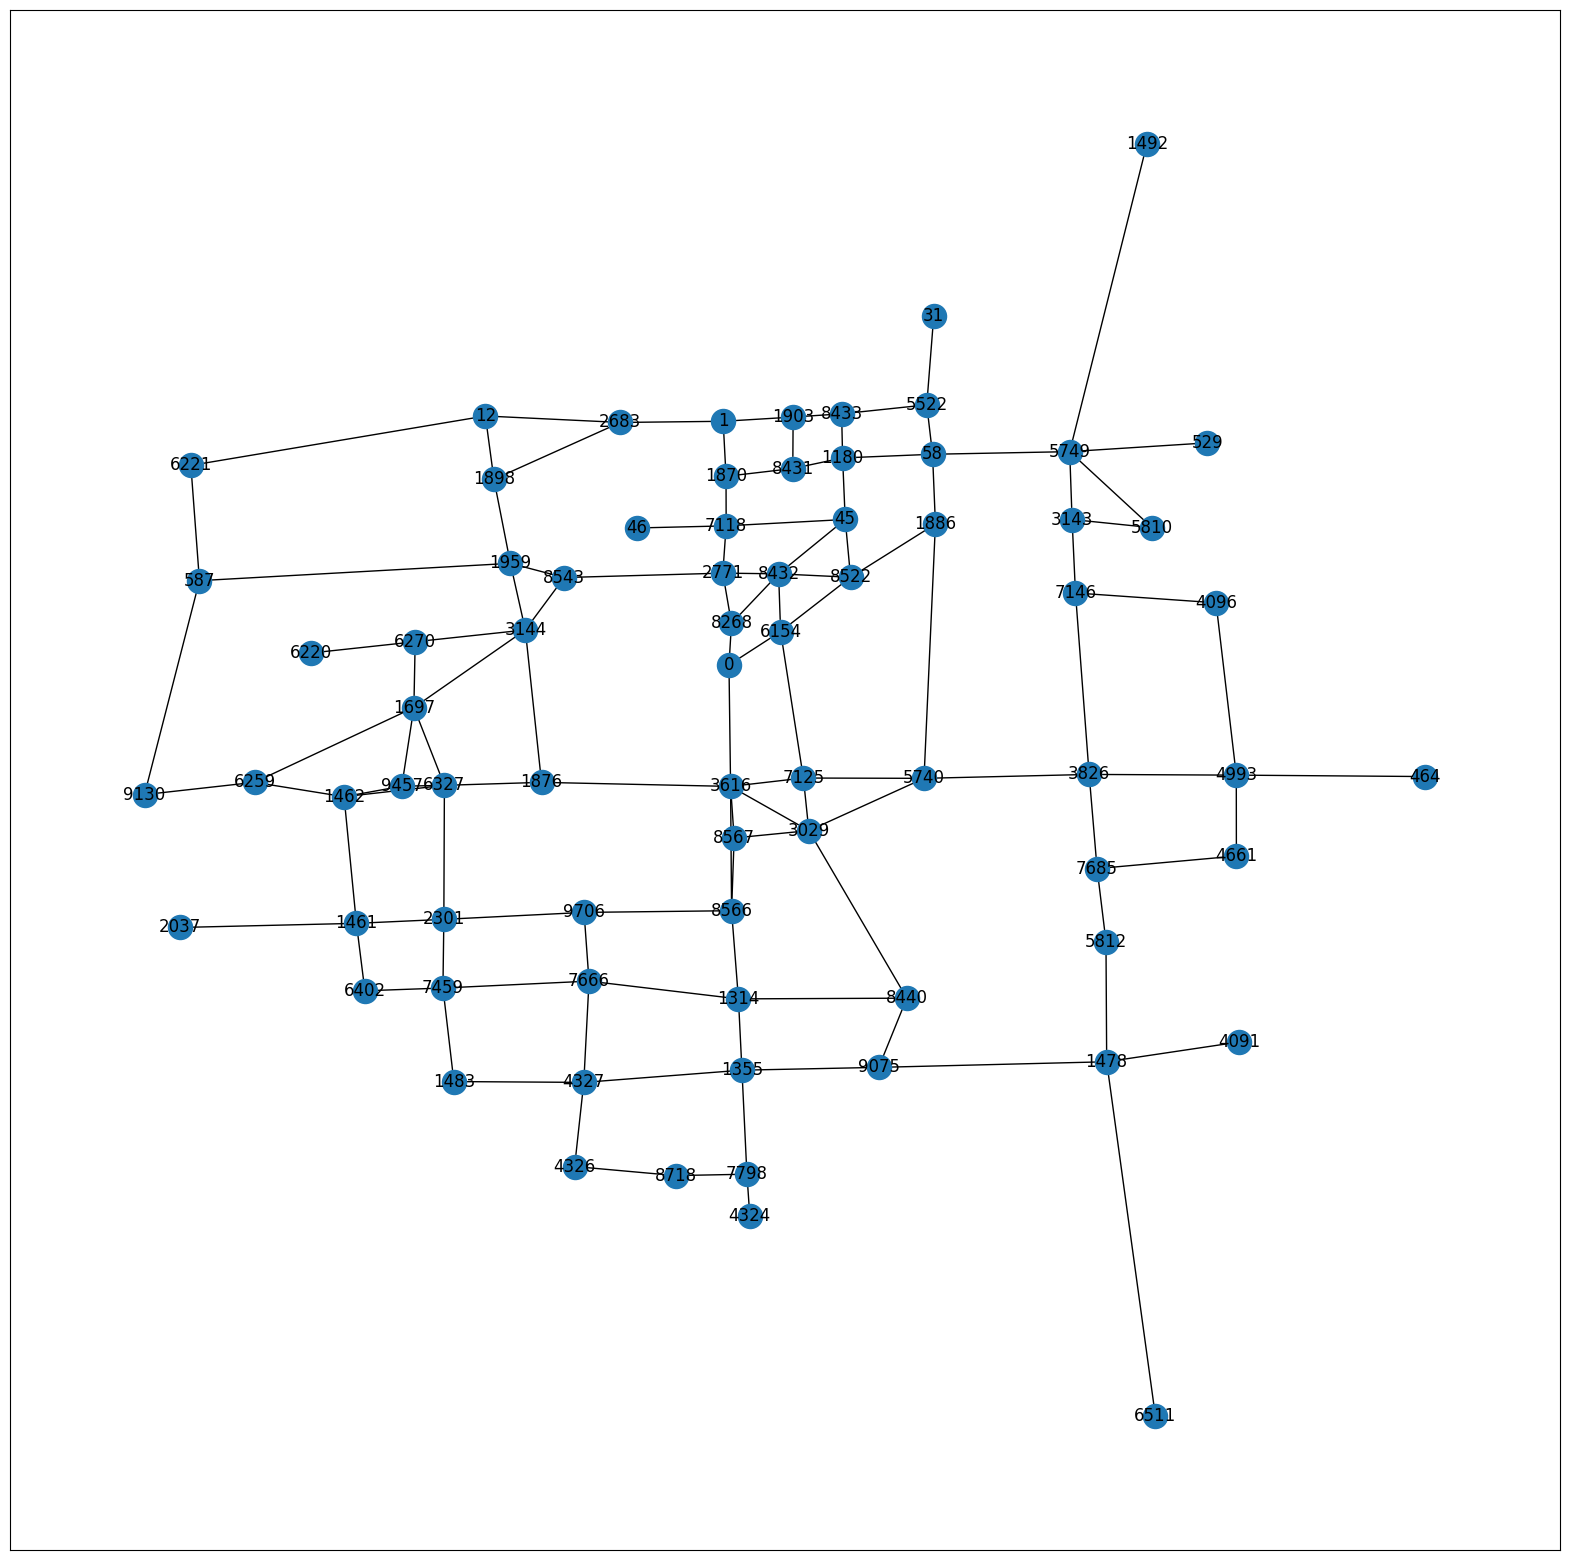

In [9]:
# Plot small sub graph

k = 6

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 0, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True)

In [58]:
# Stats
n_edges = len(g.edges)
node_strs = [str(i) for i in range(n_edges)]
oneway = np.array([graph['edge_features']['oneway'][n][:][0] for n in node_strs])
reversed_values = np.array([graph['edge_features']['reversed'][n][:][0] for n in node_strs])
length_values = np.array([graph['edge_features']['length'][n][:][0] for n in node_strs])
lanes_values = np.array([graph['edge_features']['lanes'][n][:][0] for n in node_strs])
maxspeed_values = np.array([graph['edge_features']['maxspeed'][n][:][0] for n in node_strs])
degrees = np.array(list(dict(g.degree).values()))

print(f"Number of nodes: {len(g.nodes)}")
print(f"Number of edges: {len(g.edges)}")
print(f"Is directed: {g.is_directed()}")
print(f"Min/Mean/Max degree of nodes: {degrees.min()}/{degrees.mean():.2f}/{degrees.max()}")
print(f"Oneways: {oneway.sum()}/{n_edges} ({100*oneway.mean():.2f})")
print(f"Reversed: {reversed_values.sum()}/{n_edges} ({100*reversed_values.mean():.2f})")
print(f"Min/Mean/Max values of length: {length_values.min()}/{length_values.mean():.2f}/{length_values.max()}")
print(f"Min/Mean/Max values of lanes: {lanes_values.min()}/{lanes_values.mean():.2f}/{lanes_values.max()}")
print(f"Min/Mean/Max values of max speed: {np.nanmin(maxspeed_values)}/{np.nanmean(maxspeed_values):.2f}/{np.nanmax(maxspeed_values)} ({np.isnan(maxspeed_values).mean()*100:.2f}% are NaN)")

Number of nodes: 9812
Number of edges: 16784
Is directed: False
Min/Mean/Max degree of nodes: 1/3.42/9
Oneways: 0/16784 (0.00)
Reversed: 0/16784 (0.00)
Min/Mean/Max values of length: 8.344/413.26/5204.508
Min/Mean/Max values of lanes: 0.0/0.42/10.0
Min/Mean/Max values of max speed: 20.0/72.30/120.0 (98.75% are NaN)


In [33]:
# Street type

highways = np.array([graph['edge_features']['highway'][n][:][0] for n in node_strs])
highway_values, highway_encoded, highway_counts = np.unique(highways, return_inverse=True, return_counts=True)

print(f"There are {len(highway_values)} different types of streets")
for val, c in zip(highway_values, highway_counts):
    print(f"{val}: {c} ({100*c/n_edges:.2f}%)")

There are 9 different types of streets
b'cycleway': 205 (1.22%)
b'motorway': 447 (2.66%)
b'pedestrian': 60 (0.36%)
b'primary': 1238 (7.38%)
b'residential': 7184 (42.80%)
b'secondary': 1619 (9.65%)
b'tertiary': 3908 (23.28%)
b'trunk': 877 (5.23%)
b'unclassified': 1246 (7.42%)


([<matplotlib.patches.Wedge at 0x17848bb50>,
 [Text(1.0991902966614915, 0.042198243153268714, "b'cycleway'"),
  Text(1.0858778226871675, 0.175696767745388, "b'motorway'"),
  Text(1.0643434050160387, 0.2778004971177424, "b'pedestrian'"),
  Text(0.9662530994098544, 0.5256947287930993, "b'primary'"),
  Text(-0.5311122921197119, 0.963285904163113, "b'residential'"),
  Text(-0.9196185787689592, -0.6035740796148885, "b'secondary'"),
  Text(0.04898707296894547, -1.0989086707647435, "b'tertiary'"),
  Text(0.8884399834432307, -0.6485941688138988, "b'trunk'"),
  Text(1.0702191099453284, -0.25422638869289144, "b'unclassified'")])

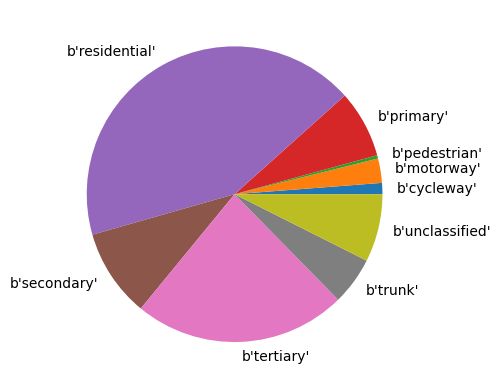

In [247]:
plt.pie(highway_counts, labels=highway_values)

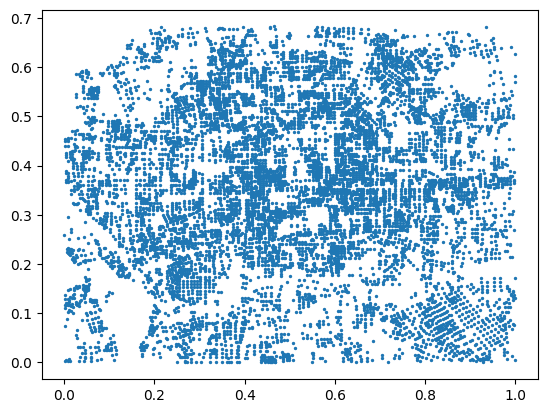

In [27]:
# Positions of nodes
positions = np.array(list(nx.get_node_attributes(g, 'loc').values()))
plt.scatter(positions[:, 0], positions[:, 1], s=2)

In [38]:
# Street names
street_names = np.array([graph['edge_features']['name'][n][:][0] for n in node_strs])

streetname_values, streetname_encoded, streetname_counts = np.unique(street_names, return_inverse=True, return_counts=True)
print(f"There are {len(streetname_values)} different street names")

streetname_dict = dict(zip(streetname_values, streetname_counts))
# works only with python >=3.8
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
streetname_dict = dict(sorted(streetname_dict.items(), key=lambda item: item[1], reverse=True))

print(f"The ten most common:")
for val in list(streetname_dict.keys())[:10]:
    print(f"{val}: {streetname_dict[val]} ({100*streetname_dict[val]/n_edges:.2f}%)")

There are 2118 different street names
The ten most common:
b'nan': 6552 (39.04%)
b'\xe8\xa5\xbf\xe4\xba\x94\xe7\x8e\xaf': 55 (0.33%)
b'\xe4\xb8\x9c\xe4\xba\x94\xe7\x8e\xaf': 50 (0.30%)
b'\xe4\xb8\x9c\xe4\xb8\x89\xe7\x8e\xaf': 48 (0.29%)
b'\xe5\x8c\x97\xe4\xba\x94\xe7\x8e\xaf': 45 (0.27%)
b'\xe8\xa5\xbf\xe4\xba\x8c\xe7\x8e\xaf': 40 (0.24%)
b'\xe5\x8d\x97\xe4\xb8\x89\xe7\x8e\xaf': 39 (0.23%)
b'\xe5\xa4\x8d\xe5\x85\xb4\xe8\xb7\xaf': 37 (0.22%)
b'\xe5\x8d\x97\xe4\xba\x94\xe7\x8e\xaf': 36 (0.21%)
b'\xe8\x8e\xb2\xe8\x8a\xb1\xe6\xb1\xa0\xe8\xa5\xbf\xe8\xb7\xaf': 35 (0.21%)


In [60]:
trajects = f['trajectories']
trajects.keys()

<KeysViewHDF5 ['000', '008', '016', '024', '032', '040', '048', '056', '064', '072', '080', '088', '096', '104', '112', '120', '128', '136', '144', '152', '160', '168', '176']>

In [122]:
trajects['000'].keys()#['20081023025304.plt'].keys()

<KeysViewHDF5 ['20081023025304.plt', '20081024020959.plt', '20081026134407.plt', '20081027115449.plt', '20081028003826.plt', '20081029092138.plt', '20081029093038.plt', '20081103101336.plt', '20081103232153.plt', '20081110013637.plt', '20081111001704.plt', '20081112023003.plt', '20081112091400.plt', '20081113034608.plt', '20081114015255.plt', '20081114101436.plt', '20081115010133.plt', '20081116085532.plt', '20081117051133.plt', '20081117155223.plt', '20081118095005.plt', '20081118095400.plt', '20081118162008.plt', '20081119012806.plt', '20081119112035.plt', '20081120035736.plt', '20081121040936.plt', '20081121113038.plt', '20081122012309.plt', '20081123102153.plt', '20081201111827.plt', '20081202071136.plt', '20081202071531.plt', '20081203032326.plt', '20081203151206.plt', '20081203234939.plt', '20081210023503.plt', '20081211044624.plt', '20081211121432.plt', '20081212042525.plt', '20081212101236.plt', '20081214011036.plt', '20090330005208.plt', '20090331003904.plt', '20090401050607.p

In [159]:
trajects['000']['20081023025304.plt'].keys()

<KeysViewHDF5 ['mode_ranges', 'modes', 'raw_coordinates', 'raw_timestamps', 'subtrajectories']>

In [158]:
trajectories = []

for k in trajects.keys():
    #print(f"{k}:")
    for p in trajects[k].keys():
        for s in trajects[k][p]['subtrajectories'].keys():
            trajectories.append(trajects[k][p]['subtrajectories'][s]['edge_idxs'][:])

len(trajectories)

2812

In [84]:
trajectories[0]

array([ 3044, 15316,  1294,  1293,  1438, 12682, 12685, 16679, 16250,
        2371,  2374])

In [119]:
x = trajects['000']['20081023025304.plt']['raw_coordinates'][:]

In [184]:
def get_trajectory(trajects, id):
    x = trajects['000'][id]['raw_coordinates'][:]
    times = trajects['000'][id]['raw_timestamps'][:]

    dists = np.linalg.norm(x[1:] - x[:-1], axis=1)
    time_diffs = times[1:] - times[:-1]
    velos = dists / time_diffs
    
    return x, velos

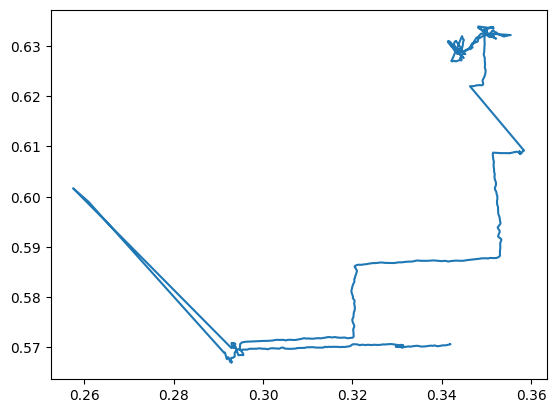

In [120]:
plt.plot(x[:, 0], x[:, 1])

(0.5386537260255598, 0.665567417895156)

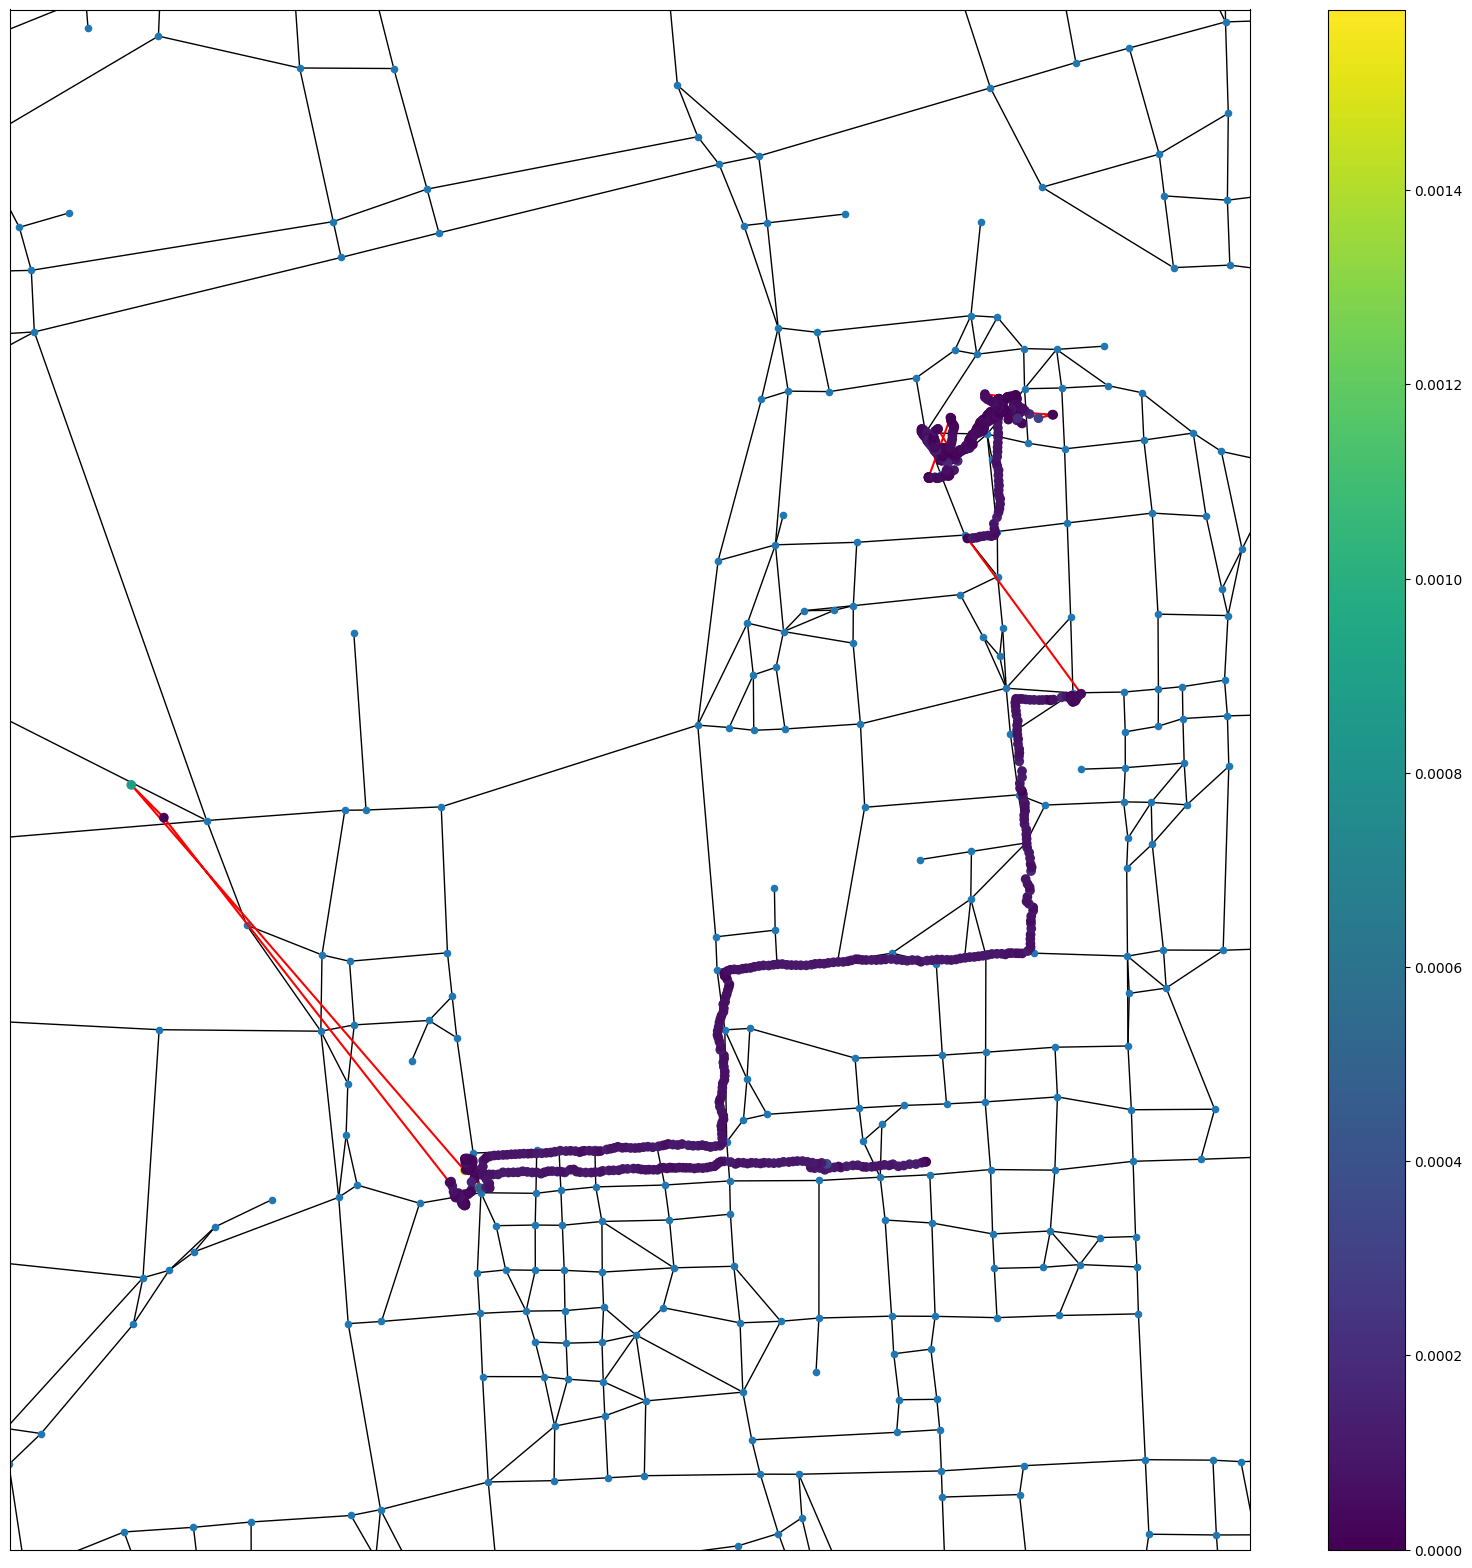

In [188]:
x, velos = get_trajectory(trajects, '20081023025304.plt')
k = 20

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 418, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)
ax.plot(x[:, 0], x[:, 1], color='red')
sc = ax.scatter(x[1:, 0], x[1:, 1], c=velos, zorder=100)
fig.colorbar(sc)
ax.set_xlim((x[:, 0].min()*0.95, x[:, 0].max()*1.05))
ax.set_ylim((x[:, 1].min()*0.95, x[:, 1].max()*1.05))
#nx.draw_networkx_nodes(sub_g, nodelist=trajectories[0], ax=ax, pos=pos, node_color='red')

(0.3050404985268144, 0.4432727340603266)

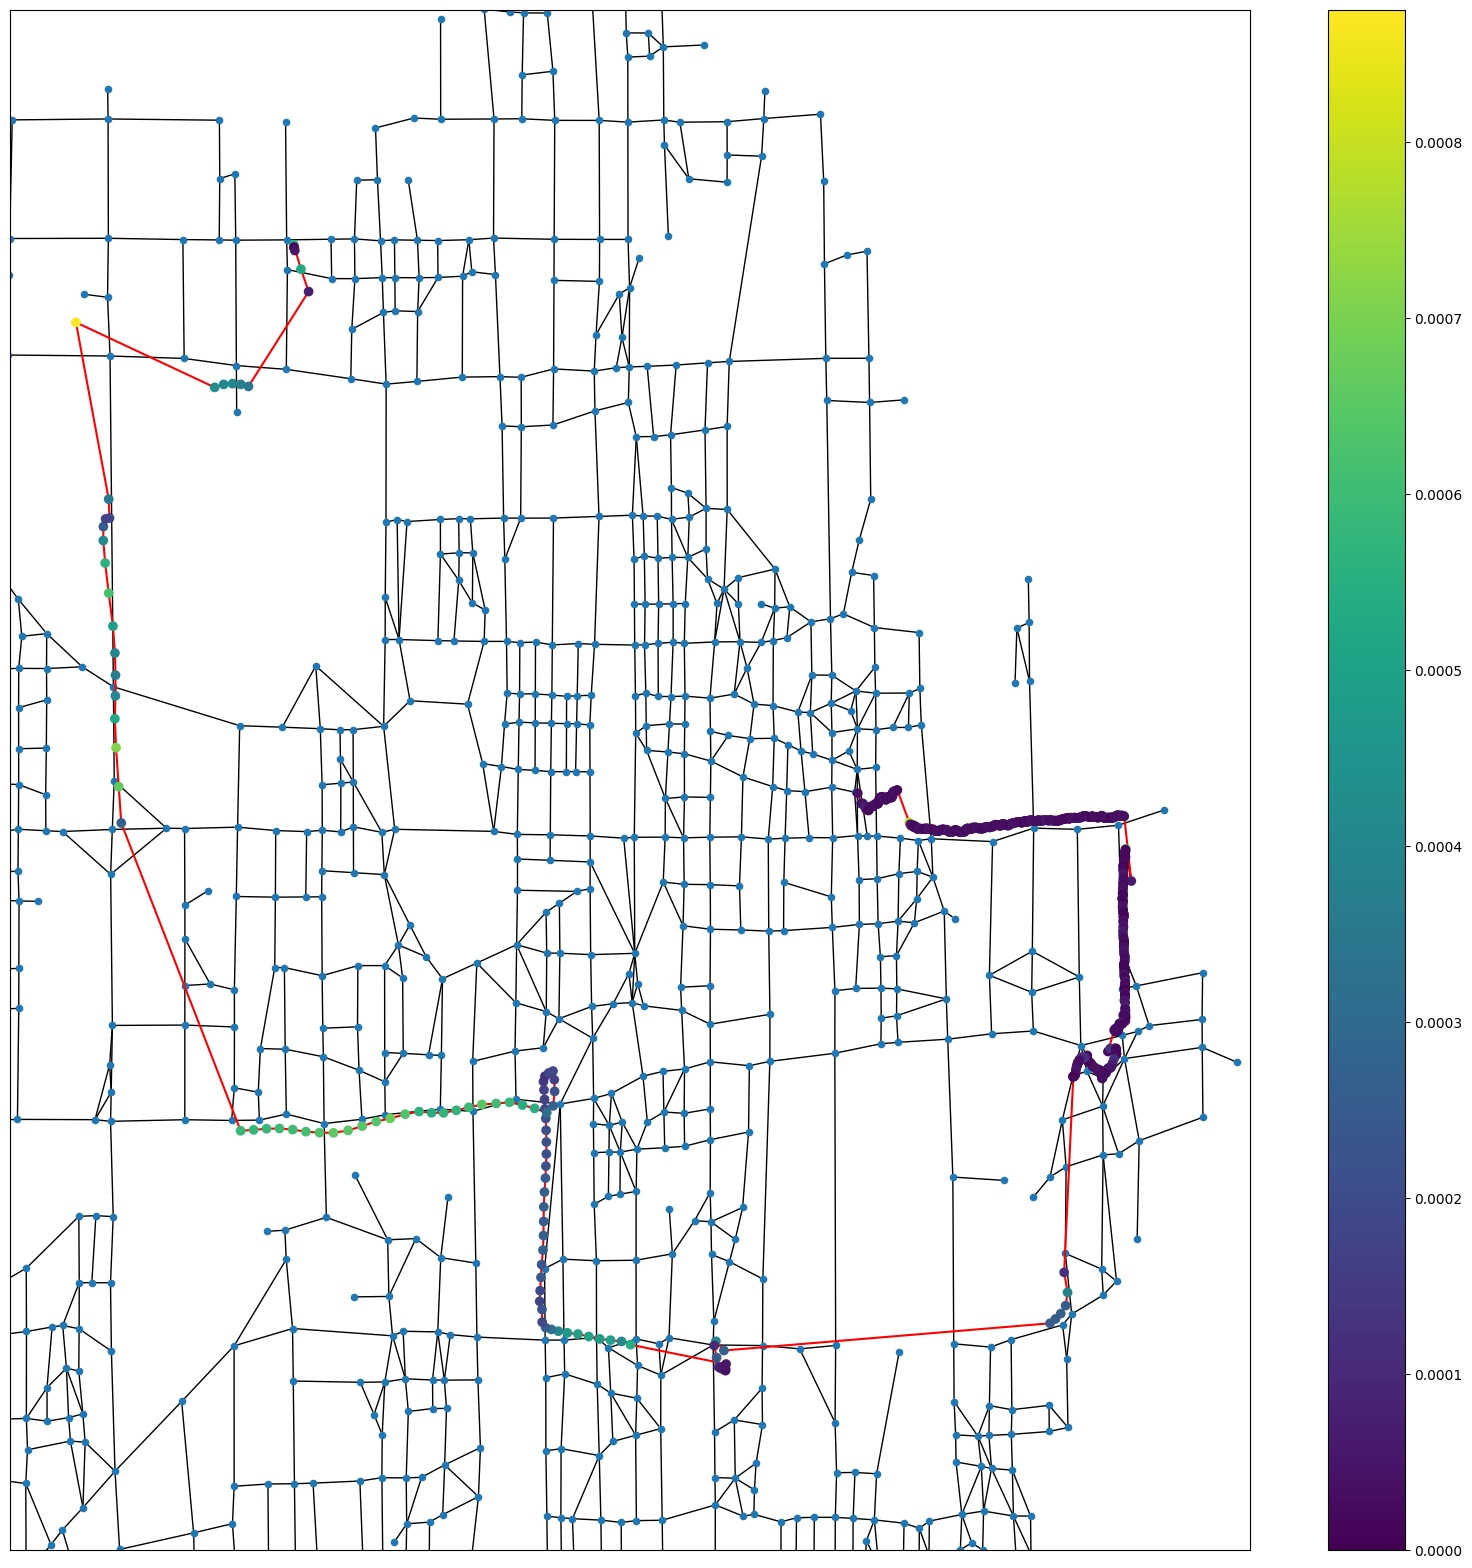

In [189]:
k = 20
x, velos = get_trajectory(trajects, '20081026134407.plt')

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 8511, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)
#nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=300, with_labels=True)
ax.plot(x[:, 0], x[:, 1], color='red')
sc = ax.scatter(x[1:, 0], x[1:, 1], c=velos, zorder=10)
fig.colorbar(sc)
ax.set_xlim((x[:, 0].min()*0.95, x[:, 0].max()*1.05))
ax.set_ylim((x[:, 1].min()*0.95, x[:, 1].max()*1.05))
#nx.draw_networkx_nodes(sub_g, nodelist=trajectories[0], ax=ax, pos=pos, node_color='red')

In [162]:
x.shape, times.shape

((745, 2), (745,))

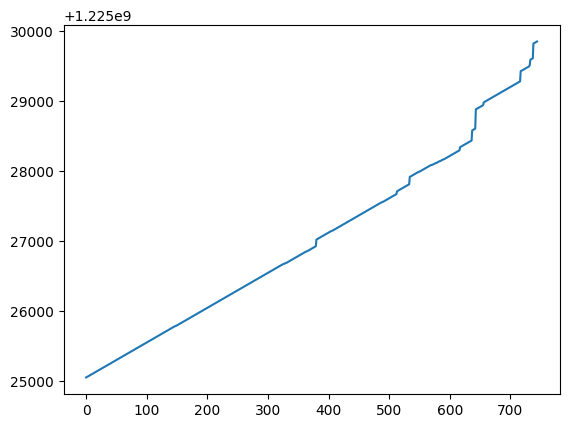

In [164]:
plt.plot(np.arange(len(times)), times)

In [191]:
trajects['000']['20081026134407.plt'].keys()

<KeysViewHDF5 ['mode_ranges', 'modes', 'raw_coordinates', 'raw_timestamps', 'subtrajectories']>

In [213]:
trajects['000']['20081026134407.plt']['subtrajectories'].keys()

<KeysViewHDF5 ['0', '1', '2', '3', '4']>

In [203]:
trajects['000']['20081026134407.plt']['subtrajectories']['0']['edge_idxs'][:].shape

(24,)

In [204]:
edges = trajects['000']['20081026134407.plt']['subtrajectories']['0']['edge_idxs'][:]
edges

array([ 8774,  8773,  1201,  1198,  7006,  9752,  4230,  4231,  7252,
        7251,  7255, 15878,  7750,  5614,  5615, 16482, 16483,  5542,
        5542, 11947, 11946,  7995,  7996,  8869])

In [205]:
all_edges = graph['edges'][()]

print(all_edges[edges])

[[3163 9682]
 [3163 8631]
 [ 347 8631]
 [ 347 2410]
 [2410 3629]
 [3629 3788]
 [1386 3788]
 [1386 3502]
 [2516 3502]
 [2516 2517]
 [2517 7747]
 [7747 9190]
 [2731 9190]
 [1896 2731]
 [1896 8516]
 [8515 8516]
 [8515 8517]
 [1869 8517]
 [1869 8517]
 [4788 8517]
 [4788 4825]
 [2835 4825]
 [2835 3197]
 [3197 4250]]


(0.30907769421892867, 0.39187462268753076)

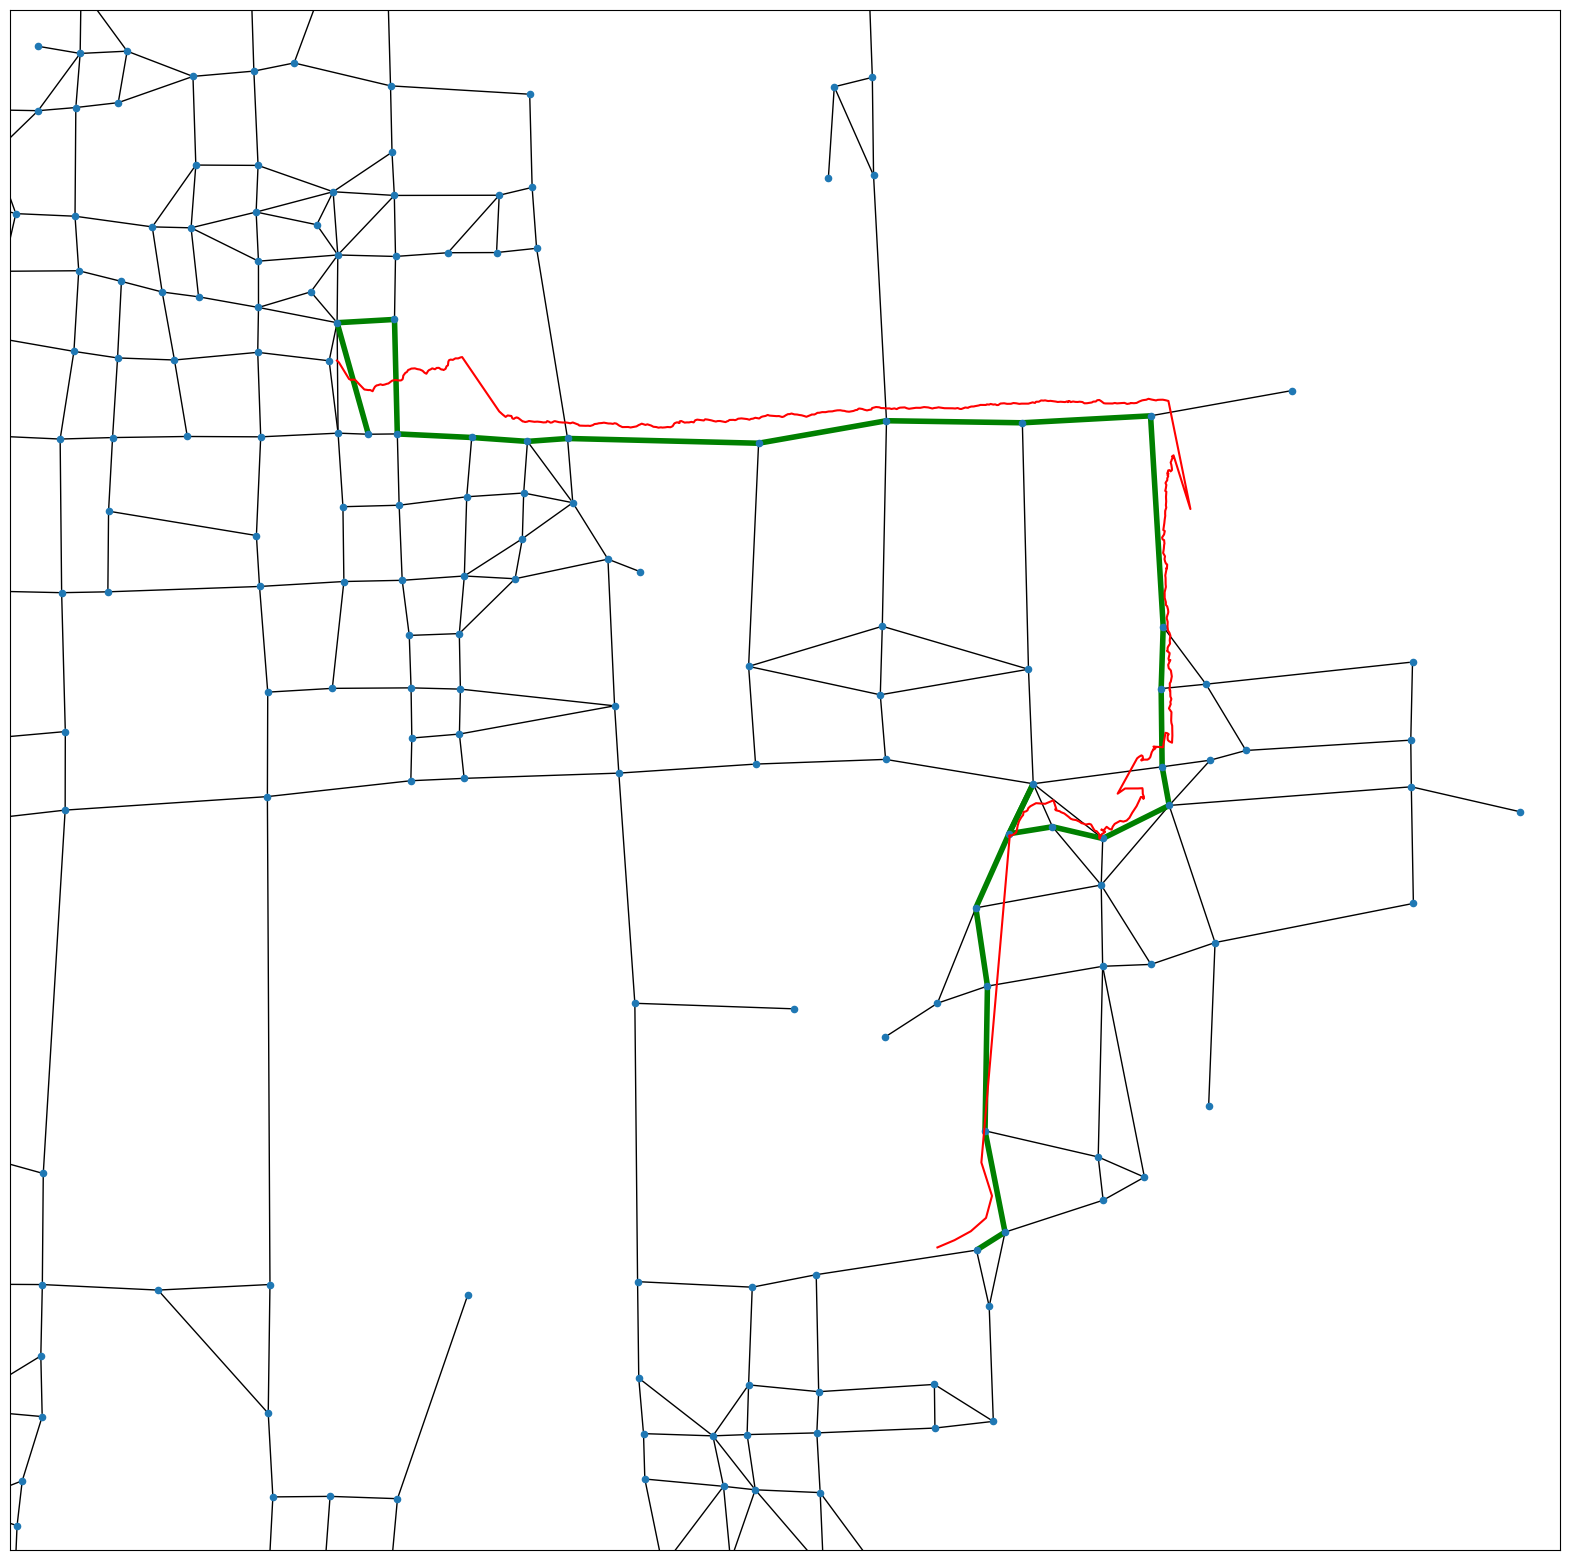

In [212]:
x = trajects['000']['20081026134407.plt']['subtrajectories']['0']['coordinates'][:]

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 8511, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)

nx.draw_networkx_edges(g, pos, edgelist=all_edges[edges], edge_color='green', width=4)
ax.plot(x[:, 0], x[:, 1], color='red')
fig.colorbar(sc)
ax.set_xlim((x[:, 0].min()*0.95, x[:, 0].max()*1.05))
ax.set_ylim((x[:, 1].min()*0.95, x[:, 1].max()*1.05))

(0.3050404985268144, 0.4432727340603266)

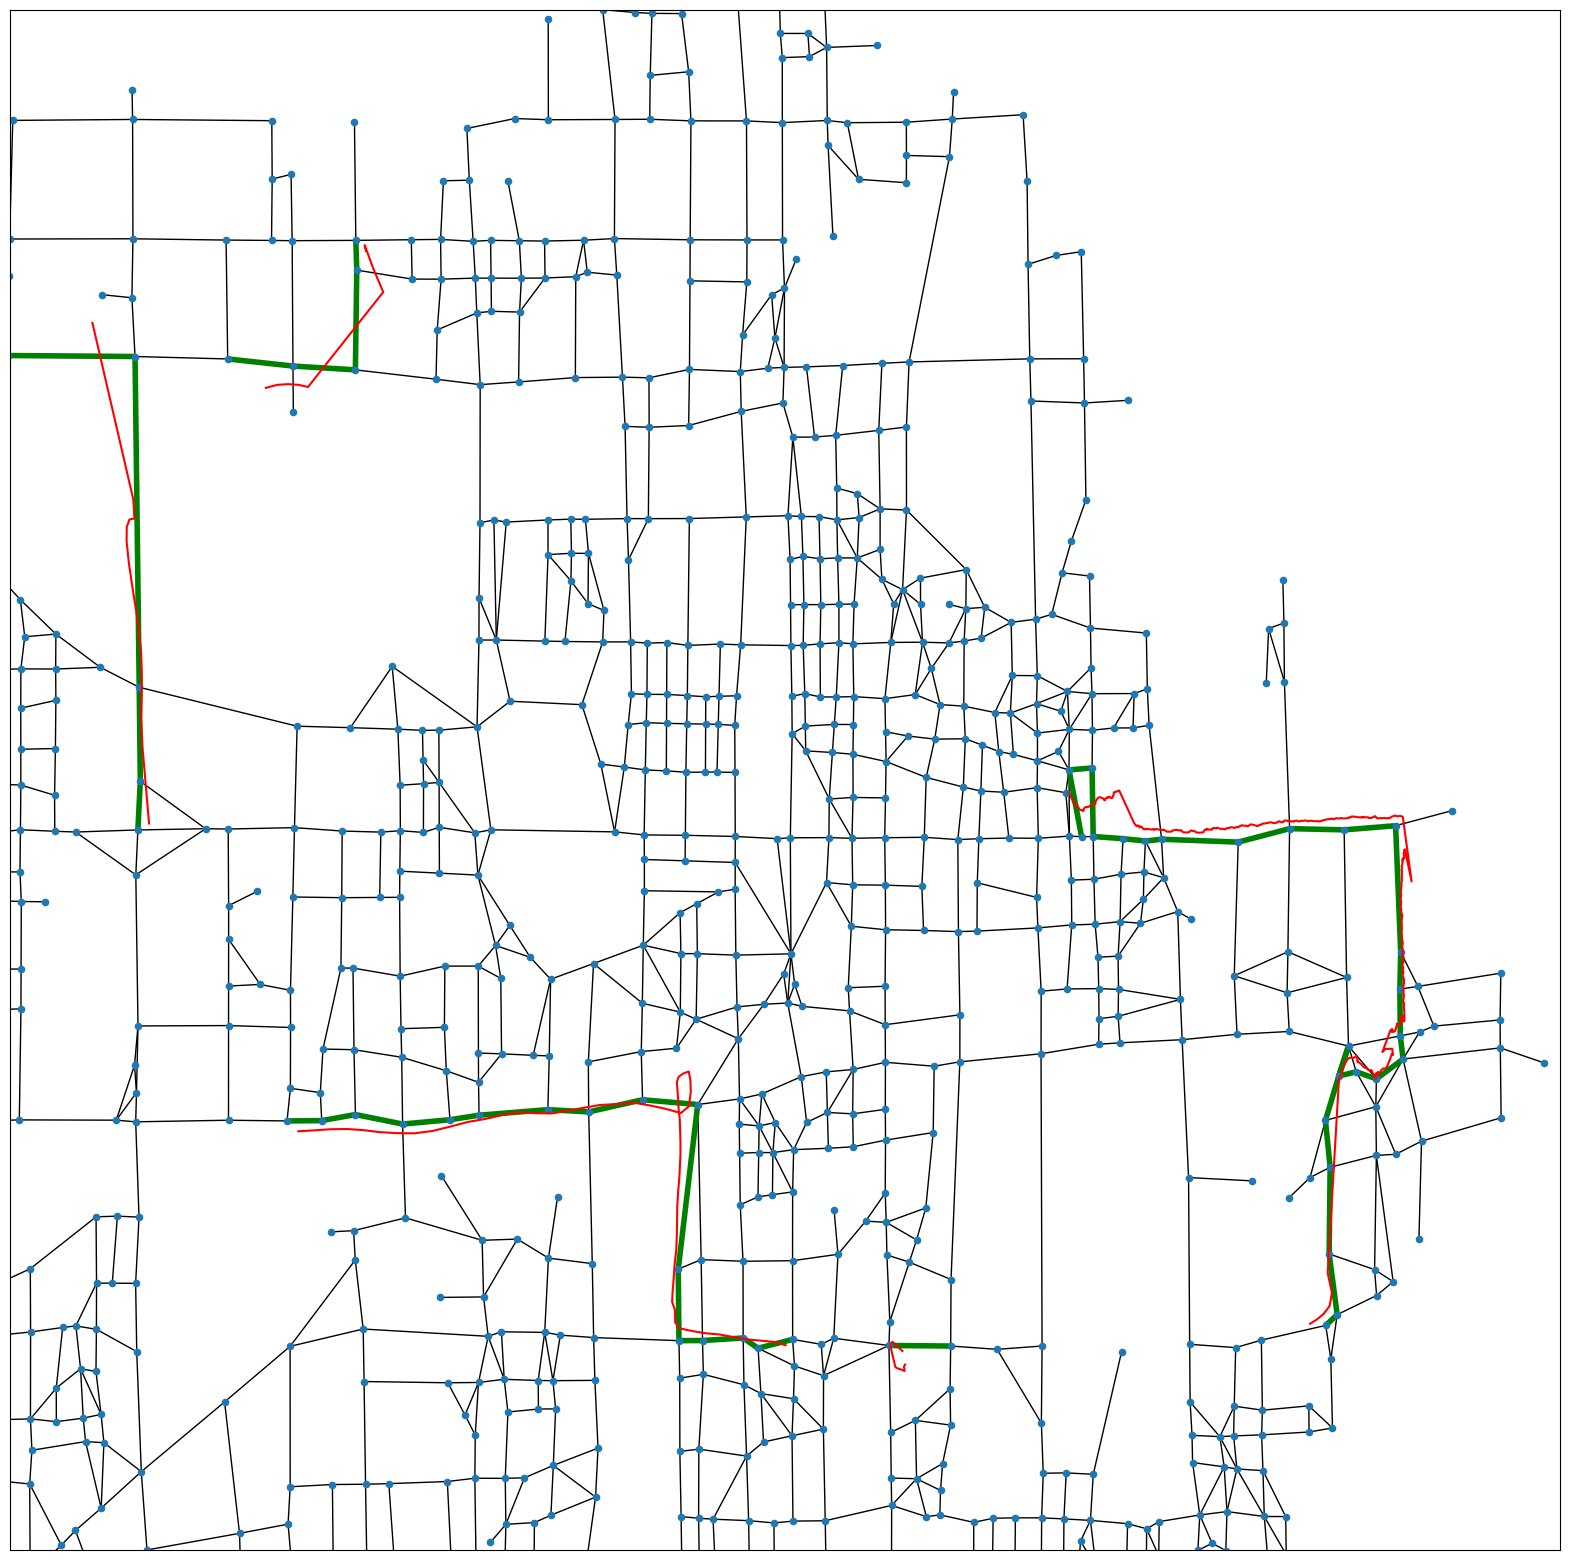

In [217]:
x = trajects['000']['20081026134407.plt']['subtrajectories']['0']['coordinates'][:]

fig, ax = plt.subplots(figsize=(20, 20))
sub_g = nx.subgraph(g, nx.single_source_shortest_path_length(g, 8511, cutoff=k).keys())
pos = nx.get_node_attributes(sub_g, 'loc')
nx.draw_networkx(sub_g, ax=ax, pos=pos, arrows=True, node_size=20, with_labels=False)

x0_min, x0_max = 100, -100
x1_min, x1_max = 100, -100

for key in trajects['000']['20081026134407.plt']['subtrajectories']:
    x = trajects['000']['20081026134407.plt']['subtrajectories'][key]['coordinates'][:]
    edges = trajects['000']['20081026134407.plt']['subtrajectories'][key]['edge_idxs'][:]
    nx.draw_networkx_edges(g, pos, edgelist=all_edges[edges], edge_color='green', width=4)
    ax.plot(x[:, 0], x[:, 1], color='red')
    x0_min = min(x0_min, x[:, 0].min())
    x0_max = max(x0_max, x[:, 0].max())
    x1_min = min(x1_min, x[:, 1].min())
    x1_max = max(x1_max, x[:, 1].max())

ax.set_xlim((x0_min*0.95, x0_max*1.05))
ax.set_ylim((x1_min*0.95, x1_max*1.05))

In [215]:
for x in trajects['000']['20081026134407.plt']['subtrajectories']:
    print(trajects['000']['20081026134407.plt']['subtrajectories'][x])

<HDF5 group "/trajectories/000/20081026134407.plt/subtrajectories/0" (9 members)>
<HDF5 group "/trajectories/000/20081026134407.plt/subtrajectories/1" (9 members)>
<HDF5 group "/trajectories/000/20081026134407.plt/subtrajectories/2" (9 members)>
<HDF5 group "/trajectories/000/20081026134407.plt/subtrajectories/3" (9 members)>
<HDF5 group "/trajectories/000/20081026134407.plt/subtrajectories/4" (9 members)>


In [218]:
f = h5py.File('../data/data/GeoLife/merged.h5', 'r')

In [220]:
f['graph'].keys()

<KeysViewHDF5 ['coordinate_scale', 'coordinate_shift', 'edge_features', 'edges', 'node_coordinates', 'node_features']>

In [226]:
f['graph']['edges'][:].shape

(16784, 2)

In [241]:
graph['node_features']['x']['11'][:]

array([116.3208398, 116.3214917, 116.3214295])

In [229]:
graph['node_coordinates'][()].min(axis=0), graph['node_coordinates'][()].max(axis=0)

(array([ 1.44042492e-05, -2.72632462e-04]), array([0.99985229, 0.68290869]))

In [248]:
f['trajectories'].keys()

<KeysViewHDF5 ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140'

In [249]:
f['trajectories']['000'].keys()

<KeysViewHDF5 ['20081023025304.plt', '20081024020959.plt', '20081026134407.plt', '20081027115449.plt', '20081028003826.plt', '20081029092138.plt', '20081029093038.plt', '20081103101336.plt', '20081103232153.plt', '20081110013637.plt', '20081111001704.plt', '20081112023003.plt', '20081112091400.plt', '20081113034608.plt', '20081114015255.plt', '20081114101436.plt', '20081115010133.plt', '20081116085532.plt', '20081117051133.plt', '20081117155223.plt', '20081118095005.plt', '20081118095400.plt', '20081118162008.plt', '20081119012806.plt', '20081119112035.plt', '20081120035736.plt', '20081121040936.plt', '20081121113038.plt', '20081122012309.plt', '20081123102153.plt', '20081201111827.plt', '20081202071136.plt', '20081202071531.plt', '20081203032326.plt', '20081203151206.plt', '20081203234939.plt', '20081210023503.plt', '20081211044624.plt', '20081211121432.plt', '20081212042525.plt', '20081212101236.plt', '20081214011036.plt', '20090330005208.plt', '20090331003904.plt', '20090401050607.p

In [250]:
f['trajectories']['000']['20081023025304.plt'].keys()

<KeysViewHDF5 ['mode_ranges', 'modes', 'raw_coordinates', 'raw_timestamps', 'subtrajectories']>

In [251]:
f['trajectories']['000']['20081023025304.plt']['subtrajectories'].keys()

<KeysViewHDF5 ['0', '1', '2', '3', '4']>

In [253]:
f['trajectories']['000']['20081023025304.plt']['subtrajectories']['0'].keys()

<KeysViewHDF5 ['coordinates', 'distance_observation_to_matched_edge', 'edge_idxs', 'edge_observation_ranges', 'edge_orientations', 'mode_ranges', 'modes', 'range', 'timestamps']>

In [255]:
f['trajectories']['000']['20081023025304.plt']['subtrajectories']['0']['edge_idxs'][:].shape[0]

11

In [258]:
n_trajectories = 0
n_plts = 0
n_subtrajectories = 0
len_subtrajectory = []

for tr in f['trajectories']:
    n_trajectories += 1
    for pl in f['trajectories'][tr]:
        n_plts += 1
        for su in f['trajectories'][tr][pl]['subtrajectories']:
            n_subtrajectories += 1
            len_subtrajectory.append(f['trajectories'][tr][pl]['subtrajectories'][su]['edge_idxs'][:].shape[0])
len_subtrajectory = np.array(len_subtrajectory)

In [259]:
n_trajectories, n_plts, n_subtrajectories

(182, 12365, 26883)

In [274]:
for i in range(11):
    print(i, (len_subtrajectory == i).sum())

0 0
1 4336
2 1339
3 1069
4 1284
5 1312
6 944
7 864
8 1077
9 828
10 799


In [277]:
(len_subtrajectory > 100).sum()

462

In [278]:
len_subtrajectory.shape

(26883,)